In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Evaluating an expression carefully

Consider the following _complicated_ expression:

$$ b(u) = \frac{1}{u^3} \sqrt{ (4 + u^4) \sqrt{1+ u^4} - 3 u^4 - 4)} $$

Notice what happens when we try a naive evaluation of the expression

In [5]:
u = np.arange(0, 0.3, 0.0001)
b_naive = lambda u: 1/u**3 * np.sqrt( (4 + u**4) * np.sqrt( 1+ u**4) - 3*u**4 - 4)
a_naive = lambda u: np.multiply(np.divide(np.sqrt(2),np.power(u, 3)),(1-np.sqrt(1+np.power(u,4))))

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


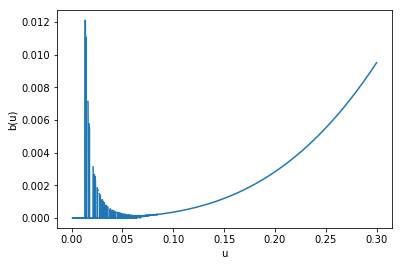

In [6]:
plt.plot(u, b_naive(u))
plt.xlabel('u')
plt.ylabel('b(u)')

The bizarre behaviour for $ u < 0.06 $ is due to round-off error.

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


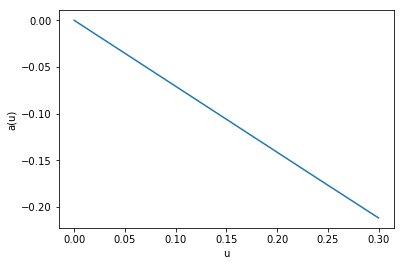

In [8]:
plt.plot(u, a_naive(u))
plt.xlabel('u')
plt.ylabel('a(u)')

### Taylor series

Taylor series can help us a lot in this situation and SymPy can help us determine those coefficients. 

In [10]:
import sympy as sp
sp.init_printing()

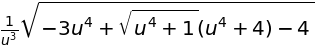

In [11]:
b_expression = sp.S('1/ u^3 * sqrt( (4 + u^4) * sqrt(1+ u^4)-3*u^4-4) ')
b_expression

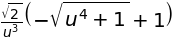

In [12]:
a_expression = sp.S('sqrt(2)/u**3*(1-sqrt(1+u**4))')
a_expression

In [15]:
b_series = sp.series(b_expression, n=20)
b_series

In [16]:
a_series = sp.series(a_expression, n=20)
a_series

In [17]:
b_taylor = sp.lambdify('u', b_series.removeO())

In [18]:
a_taylor = sp.lambdify('u', a_series.removeO())

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


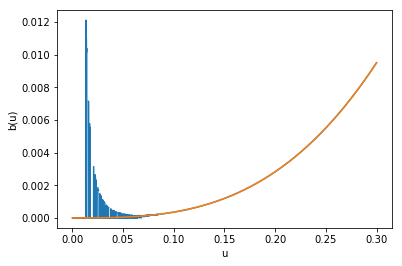

In [19]:
plt.plot(u, b_naive(u))
plt.plot(u, b_taylor(u))
plt.xlabel('u')
plt.ylabel('b(u)')

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


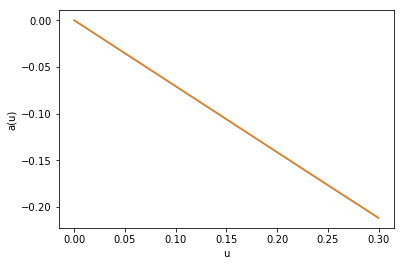

In [20]:
plt.plot(u, a_naive(u))
plt.plot(u, a_taylor(u))
plt.xlabel('u')
plt.ylabel('a(u)')

### Considering the absolute difference

//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
//anaconda/envs/IceDEF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


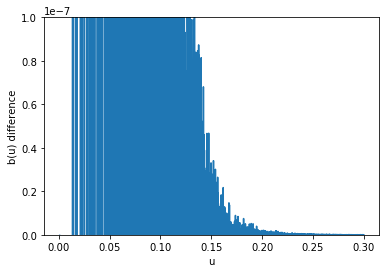

In [145]:
plt.plot(u, b_naive(u) - b_taylor(u))
plt.xlabel('u')
plt.ylabel('b(u) difference')
plt.ylim(0, 1e-7)

/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/evankielley/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


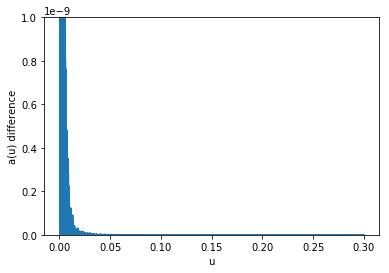

In [23]:
plt.plot(u, a_naive(u) - a_taylor(u))
plt.xlabel('u')
plt.ylabel('a(u) difference')
plt.ylim(0, 1e-9)

In [25]:
import scipy.io as sio

In [106]:
modelfull = 'ECCO_20th'
root = '/home/evankielley/IceDEF/WagnerModel'                           
outloc = root + '/output/' + modelfull + '/'
inFile = outloc + 'b_arr.mat'                                     
b_mat = sio.loadmat(inFile)['b_arr'];

In [107]:
u_start = 0.1; u_end = 1.001; u_inc = 0.001
u_range = np.arange(u_start,u_end,u_inc)

b_py = np.empty([len(u_range), 2])*np.nan

u = u_start
for  i in range(0,len(u_range)):
    b_py[i,:] = u, b_taylor(u)
    u = u + u_inc;

In [108]:
b_diff = b_mat - b_py

<function matplotlib.pyplot.show>

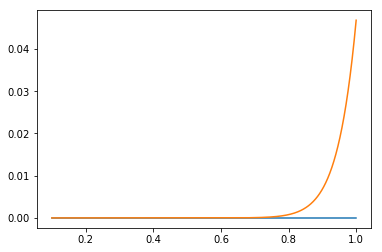

In [109]:
plt.plot(b_py.T[0,:],b_diff)
plt.show